## On-line force capability evaluation based on efficient polytope vertex search

Short script demonstrating usage of python module

In [289]:
import polytope_solver # new force capacity module
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook


## Four link planar robot example

Force polytope and ellispoid example calculaton using the newly developed force capacity calculation python module

`n=4` and `m=2`

In [221]:
# jacobian function for four link planar robot
def four_link_jacobian(joints):
    sq1 = np.sin(joints[0])
    sq12 = np.sin(joints[0] + joints[1])
    sq123 = np.sin(joints[0] + joints[1] + joints[2])
    sq1234 = np.sin(joints[0] + joints[1] + joints[2] + joints[3])
    cq1 = np.cos(joints[0])
    cq12 = np.cos(joints[0] + joints[1])
    cq123 = np.cos(joints[0] + joints[1] + joints[2])
    cq1234 = np.cos(joints[0] + joints[1] + joints[2] + joints[3])
    return np.array([[0.5*cq1+0.5*cq12+0.5*cq123+0.7*cq1234, 0.5*cq12+0.5*cq123+0.7*cq1234, 0.5*cq123+0.7*cq1234, +0.7*cq1234], [-0.5*sq1-0.5*sq12-0.5*sq123-0.7*sq1234, -0.5*sq12-0.5*sq123-0.7*sq1234, -0.5*sq123-0.7*sq1234, -0.7*sq1234]])

In [327]:
# joint positions q
q  = [0,np.pi/2,np.pi/5,0]
# joint torque limits tau
tau_min = np.array([[-1], [-1], [-1], [-1]])
tau_max = np.array([[1], [1], [1], [1]])

# jacobian
J = four_link_jacobian(q)
# calculate the force polytope
f_vert, polytopes = polytope_solver.force_polytope_ordered(J,tau_min,tau_max)
# calculate the force ellipsoid
S,U = polytope_solver.manipulability_force(J, tau_max)

<IPython.core.display.Javascript object>


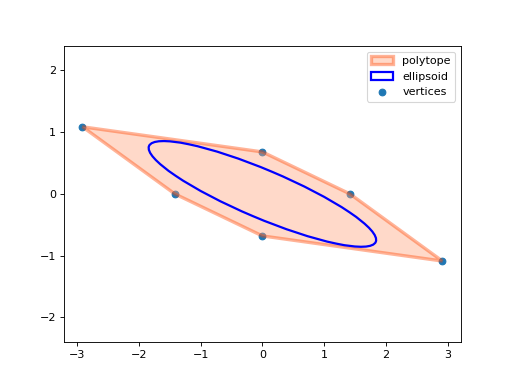

In [328]:
# visualise polytope ellispoid
fig = plt.figure(0)
ax = plt.gca()
plt.scatter(f_vert[0,:],f_vert[1,:], label="vertices")
plt.fill(polytopes[0][0,:],polytopes[0][1,:], alpha=0.4, facecolor='lightsalmon', edgecolor='orangered', linewidth=3,label='polytope')
ellipse = Ellipse(xy=(0, 0), width=2*S[1], height=2*S[0], 
                        edgecolor='b', fc='None', lw=2, angle=-np.arctan2(U[0,0],U[0,1])*180/np.pi,label='ellipsoid')
ax.add_patch(ellipse)
plt.axis('equal')
plt.legend()
plt.show()

## Generic 3D robot example
`m=3`
Define jacobian matrix and torque limits

In [324]:
J = np.array([[1, 0, 2, 0, 1, 0], [0, 1, 1, 0, 1, 0], [1, 0, 0, 1, 1, 1]])
t_min = np.array([[-2], [-1], [-1], [-1], [-1], [-1]])
t_max = np.array([[2], [1], [1], [1], [1], [1]])

Calculate the force polytope vertices
```
t_min <  J^T.f < t_max
```

In [325]:
f_vert, polytopes = polytope_solver.force_polytope_ordered(J,t_min,t_max)

Visualise the vertices `f_vert`

<IPython.core.display.Javascript object>


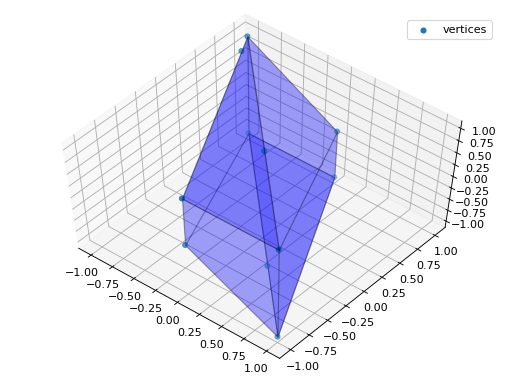

In [326]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
# add vertices
ax.scatter(f_vert[0,:],f_vert[1,:],f_vert[2,:],label='vertices')
# plot polygones
for polygone in polytopes:
    poly = Poly3DCollection(list([zip(polygone[0,:],polygone[1,:],polygone[2,:])]))
    poly.set_alpha(0.2)
    poly.set_facecolor('blue')
    poly.set_edgecolor('black')
    ax.add_collection3d(poly)
plt.tight_layout()
plt.legend()
plt.show()